# План работы

1. Изучение данных
2. Предобработка данных
3. Расчет необходимых данных
4. Анализ полученных данных
5. Вывод

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #Импортируем библиотеку pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
#Данную библиотеку и код мне подсказал преподаваетль, так как далее при выполнении кода, выходила ошибка,
#которая мешала визуально)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #Сохраняем таблицу в переменную data

In [5]:
data.head(20) #Для ознакомления выведем первые 20 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.info() #Выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

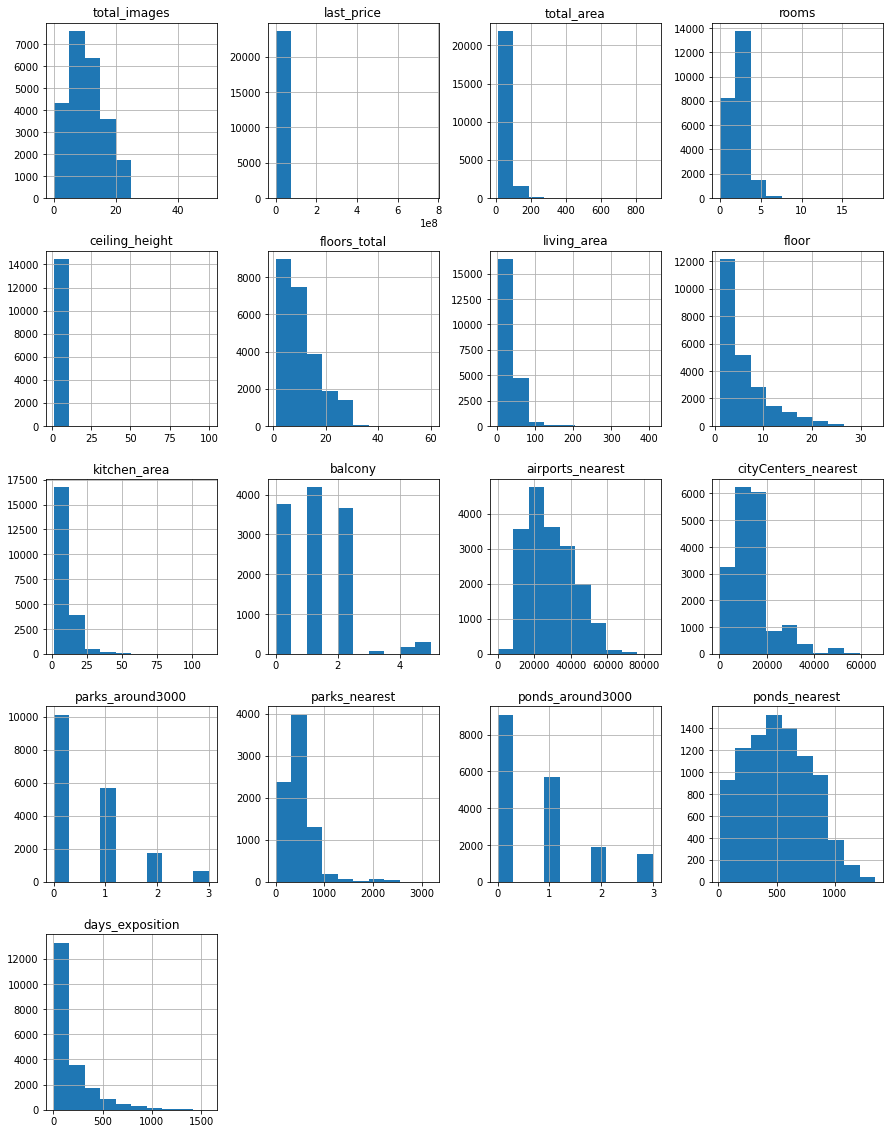

In [7]:
data.hist(figsize=(15, 20)) #Для наглядности построем общую гистограмму для всех числовых столбцов таблицы.

## Предобработка данных

### Пропущенные значения

In [8]:
data.isna().sum() #Найдем общее количество пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#Для лучшей наглядности выведем сразу долю пропусков
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


В 14 столбцах из 22 были найдены пропущенные значения. Изучим столбцы и заполним пропущенные значения там, где это возможно.
- `is_apartment` - первое что бросается в глаза с долей пропусков в 88%. Исходя из описания к данным - этот столбец отвечает на вопрос: относится ли данное помещение к апартаментам? Для начала разберемся: что такое апартаменты? Апартаменты — это нежилые, но по характеристикам и удобствам практически не уступающие квартирам помещения, в которых можно жить. Ввиду большого процента пропусков, отследить как те или данные влияют на данный столбец - мы не можем, и следовательно восстановить данные также не получится. В связи с этим, это столбец можем оставить без обработки.
- `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` - значения в данных столбцах были получены автоматически на основе картографических данных. Следовательно пропуски в значениях могут означать, что то или иное значение просто невозможно указать. Например, отсутствие аэропорта в посёлке, и тем самым указывать расстояние до аэропорта - неккоректно, или расстояние до ближайшего парка, может указывать на то, что парка в населенном пункте - нет. Единственные пропуски, которые можно обработать в данных столбцах - это наличие парков или водоемов в радиусе 3 км - если данные не удалось получить, то можно предположить, что их просто нет, и следовательно все пропуски мы може прировнять к нулю. Следовательно отсутствие значений в расстояних до ближайшего водоема или парка, указывает опять же на то, что в радиусе 3 км, их просто нет, следовательно значения можно оставить пустыми, так как заполнять их какими то медианными или срелними значениями будет неккоректно.
- `balcony` - продавец просто мог не указать количество балконов, так как их у него нет. Следовательно все пропуски можно заполнить значением '0'.
- `ceiling_height` - пропуски в данном столбце можно заполнить медианным значением по каждому населенному пункту, предварительно изучив столбец на аномалии.
- `floors_total` - процент пропусков незначителен, поэтому пропуски можно удалить.
- `locality_name` - доля пропусков совсем мала, строки с пропущенными значениями просто удалим
- `kitchen area` и `living_area` - найдем соотношение медианной общей площади к медианной жилой/кухонной. А затем, заполним пропуски в столбце `living_area`/`kitchen_area` отношением общей площади к найденному соотношению.
- `days_exposition` - пропуски в данних столбцах могут озночать то, что на момент выгрузки данных, объявление еще активно

In [10]:
data['balcony'] = data['balcony'].fillna(0) #Заполним пропуски в столбце balcony

In [11]:
data = data.dropna(subset=['locality_name']) #Удалим пропущенные значения в столбце locality_name

In [12]:
data = data.dropna(subset=['floors_total']) #Удалим пропущенные значения в столбце locality_name

In [13]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) #Заполним пропуски в park_nearest

In [14]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #Заполним пропуски в ponds_nearest

In [15]:
#Высоту потолков каждого населенного пункта заполним медианным значением этого населенного пункта
for t in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[(data['locality_name'] == t), 'ceiling_height'].median()
    except:
        pass
#Ввиду отсутствия значения высоты потолка в некоторых населенных пунктах, выходила ошибка, которую мы убрали с помощью
#библиотеки warnings

In [16]:
data['ceiling_height'].isna().sum() #Проверим количество пропущенных значений после заполнения медианной

120

В столбце `ceiling_height` осталось незначительно количество пропусков, от которых мы просто избавимся.

In [17]:
data = data.dropna(subset=['ceiling_height'])

In [18]:
#Еще раз взглянем на пропущенные значения
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,0.0
floors_total,0.0
living_area,7.9
floor,0.0
is_apartment,88.3


In [19]:
#код ревьюера
living_median_area = (data['total_area']).median()/(data['living_area']).median()
data.loc[data['living_area'].isna(),'living_area'] = data['total_area']/living_median_area

kitchen_median_area = (data['total_area']).median()/(data['kitchen_area']).median()
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = data['total_area']/kitchen_median_area

In [20]:
#Найдем соотношение медианной общей площади к медианной жилой площади и сохраним в переменной ratio_la
#ratio_la = data['total_area'].median()/data['living_area'].median()

In [21]:
#Далее применим цикл, который пройдется по каждому значению общей площади, и заполнит пропуски 
#отношением общей площади к найденному соотношению
'''for row in data['total_area']:
    data.loc[(data['total_area'] == row) & (data['living_area'].isna()), 'living_area'] = \
    row / ratio_la'''

"for row in data['total_area']:\n    data.loc[(data['total_area'] == row) & (data['living_area'].isna()), 'living_area'] =     row / ratio_la"

In [22]:
#Повторим действия, но уже для заполнения пропусков в площадях кухонь
#ratio_ka = data['total_area'].median()/data['kitchen_area'].median()

In [23]:
'''for row in data['total_area']:
    data.loc[(data['total_area'] == row) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    row / ratio_ka'''

"for row in data['total_area']:\n    data.loc[(data['total_area'] == row) & (data['kitchen_area'].isna()), 'kitchen_area'] =     row / ratio_ka"

In [24]:
#Еще раз взглянем на пропущенные значения
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,0.0
floors_total,0.0
living_area,0.0
floor,0.0
is_apartment,88.3


### Тип данных

Еще раз вызовем метод `info()` и изучим тип данных в столбцах, и при необходимости изменим.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23445 non-null  int64  
 1   last_price            23445 non-null  float64
 2   total_area            23445 non-null  float64
 3   first_day_exposition  23445 non-null  object 
 4   rooms                 23445 non-null  int64  
 5   ceiling_height        23445 non-null  float64
 6   floors_total          23445 non-null  float64
 7   living_area           23445 non-null  float64
 8   floor                 23445 non-null  int64  
 9   is_apartment          2748 non-null   object 
 10  studio                23445 non-null  bool   
 11  open_plan             23445 non-null  bool   
 12  kitchen_area          23445 non-null  float64
 13  balcony               23445 non-null  float64
 14  locality_name         23445 non-null  object 
 15  airports_nearest   

Первое, что бросается в глаза - это тип данных `object` столбца `first_day_exposition`. Заменим формат данного столбца на `datetime`.
Также заменим тип данных в столбцах `balcony`, `parks_around3000`, `ponds_around3000`,  с `float` на `int`, так как данные величины могут быть только целым числом.
`floors_total`, `days_exposition` - так как в столбце есть пропуски, то при преобразовании типов сиспользуем nullable type `Int64`.
Заменять тип данных необходимо для удобства работы и вычислений.

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [27]:
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['floors_total'] = data['floors_total'].round().astype('Int64')
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23445 non-null  int64         
 1   last_price            23445 non-null  float64       
 2   total_area            23445 non-null  float64       
 3   first_day_exposition  23445 non-null  datetime64[ns]
 4   rooms                 23445 non-null  int64         
 5   ceiling_height        23445 non-null  float64       
 6   floors_total          23445 non-null  Int64         
 7   living_area           23445 non-null  float64       
 8   floor                 23445 non-null  int64         
 9   is_apartment          2748 non-null   object        
 10  studio                23445 non-null  bool          
 11  open_plan             23445 non-null  bool          
 12  kitchen_area          23445 non-null  float64       
 13  balcony         

### Дубликаты

Изучим данные на наличие явных и неявных дубликатов. Неявные дубликаты могут содержаться в названиях населенного пункта.

In [29]:
data.duplicated().sum() #Явных дубликатов в данных

0

In [30]:
data['locality_name'].unique() #Изучим названия всех населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'се

In [31]:
data['locality_name'].nunique() #Посмотрим сколько всего уникальных значений

283

In [32]:
#Заменим все ё на ё, чтобы убрать посёлки и оставить только поселки)
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') 

Для удобства расчетов и поиска дубликатов - категоризируем данные. Создадим новый столбец `locality_type`, где отнесем тот или иной населенный пункт к определенному типу: 
- деревня
- село
- поселок
- город 
- садовое товарищество
- котеджный поселок

In [33]:
#Пройдемся по столбцу функцией, которая будет возвращать тот или иной тип населеного пункта
def what_locality_type(row):
    if 'коттеджный' in row:
        return 'Котеджный поселок'
    elif 'поселок' in row:
        return 'Поселок'
    elif 'село' in row:
        return 'Село'
    elif 'деревня' in row:
        return 'Деревня'
    elif 'товарищество' in row:
        return 'Садовое товарищество'
    else:
        return 'Город'

In [34]:
data['locality_type'] = data['locality_name'].apply(what_locality_type) #Применим функцию

In [35]:
data.groupby('locality_type')['locality_name'].count() #Проверим, что получилось

locality_type
Город                   19934
Деревня                   900
Котеджный поселок           2
Поселок                  2584
Садовое товарищество        2
Село                       23
Name: locality_name, dtype: int64

Теперь можно избавляться от типа населеного пункта в столбце `locality_name`

In [36]:
#Для удобства сосздадим функцию, которая на вход будет принимать значения от которых необходимо избавиться, а на выходе менять 
#данное значение на пробел
def del_type(wrong_values):
    for i in wrong_values:
        data['locality_name'] = data['locality_name'].str.replace(i, '')
        
#Значения пропишем в виде списка, при необходимости который можно будет дополнить    
wrong_values = ['поселок', 'городского типа', 'городской', 'деревня', 'село'
                , 'садовое товарищество','садоводческое некоммерческое товарищество', 'станции', 'при железнодорожной'
               , 'коттеджный']

del_type(wrong_values) #применим функцию

In [37]:
data['locality_name'] = data['locality_name'].str.strip() #Избавимся от пробелов
data['locality_name'].unique() #Проверим полученный результат

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Ефимовский', 'Плодовое', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин',
       'Победа', 'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',
       'Александровская', 'Лопу

Такие значения `str` как `имени` - оставим, так как при сложении `locality_type` + `locality_name` в сумме получим полноценное название.

In [38]:
data.value_counts('locality_type')

locality_type
Город                   19934
Поселок                  2584
Деревня                   900
Село                       23
Котеджный поселок           2
Садовое товарищество        2
dtype: int64

### Аномальные значения

Аномальные значения могут содержаться в любых данных, которые можно измерить. 

In [39]:
data.describe() #Посмотрим разброс значений в датафреме и тем самым найдем максимально явные аномалии

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23445.000000,2.344500e+04,23445.000000,23445.000000,23445.000000,23445.000000,23445.00000,23445.000000,23445.000000,23445.000000,18036.000000,18059.000000,23445.000000,8030.000000,23445.000000,9034.000000,20300.000000
mean,9.885605,6.564800e+06,60.385002,2.071614,2.733913,10.708936,34.65335,5.894306,10.511222,0.594498,28794.859226,14188.378869,0.471231,490.580448,0.592792,518.295439,180.972709
std,5.684592,1.093316e+07,35.726061,1.079836,1.014787,6.593479,22.44247,4.876604,6.048156,0.961818,12630.985024,8610.347594,0.749562,341.572956,0.885180,278.028337,219.987774
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.00000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.550000,5.000000,19.00000,2.000000,7.000000,0.000000,18557.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.00000,4.000000,9.000000,0.000000,26757.000000,13094.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.20000,8.000000,12.000000,1.000000,37273.000000,16280.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.70000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сразу обратим внимание на максимальные и минимальные значения в столбцах. Явно выделяются следующие аномалии:
- максимальная и минимальная высоты потолка - 1 метр и 100 метров соответственно
- максимальная площадь - 900 квадратных метров - это может быть как артефакт, так и корректной величиной.
- 19 комнат вглядит подозрительно
- 60 этажей
- минимальная цена 12 190
- расстояние до аэропорта 0 метров
- подозрительные значения сроков объявлений на 25% и 50%

Сначала рассмотрим высоту потолка. Стандартная высота потолков в квартире варьируется от 2.1 до 3.2 метров в зависимости от типа жилья. В редких случаях можно рассмматривать высоту потолка в 2 метра, например, старый частный дом, построенный "своими руками". Также можно рассмотреть высоту потолка до 4.5 метров включительно, предположив, например, что это частный элитный дом или "сталинская" постройка, где потолки гораздо выше. Все остальные значения, предлагаю рассмотреть как аномальные, и в зависимости от показателя обработать или удалить.

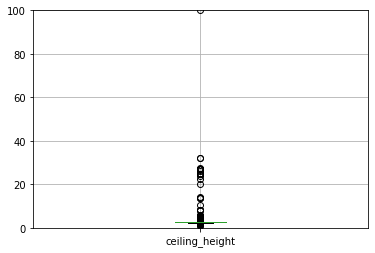

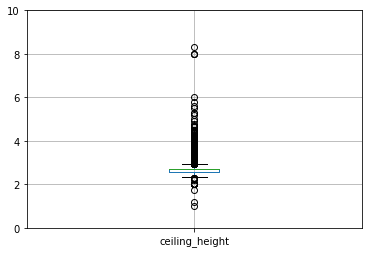

In [40]:
#Изучим данные с помощью диаграммы размаха
data.boxplot(column='ceiling_height')
plt.ylim(0, 100)
plt.show()
data.boxplot(column='ceiling_height')
plt.ylim(0, 10)
plt.show()

На графике видно нормальное распределение, которое примерно базируется от 2.5 до 3 метров. Ввиду того, что данные столбцы были заполнены человеком, то нужно учитывать человеческий фактор. Например, при указании высоты потолка, продавец мог просто забыть поставить точку, тем самы потолок из 25 метров превращается в 2.5, что уже похоже на правду. Следовательно значения от 20 метров можно обработать вручную, поделив все значения на 10. После обработки, все строки со значениями от 4.5 метров удаляем, так как эти значения могут в дальнейшем неккоректно повлиять на анализ.

In [41]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10

In [42]:
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4.5)]

Теперь изучим общую площадь помещения

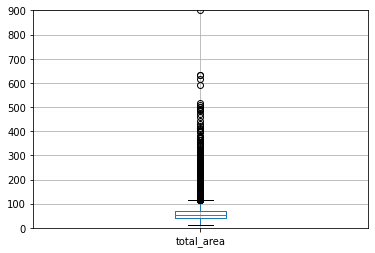

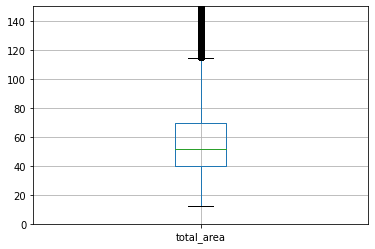

In [43]:
#Изучим данные с помощью диаграммы размаха
data.boxplot(column='total_area')
plt.ylim(0, 900)
plt.show()
data.boxplot(column='total_area')
plt.ylim(0, 150)
plt.show()

In [44]:
data[data['total_area'] > 200] #Изучим данные, где площадь более 200 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.000000,3,NaN,...,1,Санкт-Петербург,22673.0,1771.0,2,508.0,3,366.0,62,Город
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.000000,4,NaN,...,0,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14,Город
509,5,90000000.0,225.0,2016-06-26,6,2.70,4,134.000000,2,NaN,...,2,Санкт-Петербург,32864.0,5720.0,0,NaN,2,519.0,416,Город
521,20,25717300.0,230.1,2015-01-21,3,2.60,3,130.000000,1,NaN,...,1,Пушкин,16877.0,29030.0,2,676.0,3,278.0,1441,Город
581,20,65000000.0,365.0,2019-03-18,7,2.90,7,210.576923,7,NaN,...,0,Санкт-Петербург,19827.0,1690.0,3,378.0,3,58.0,<NA>,Город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4,181.800000,2,NaN,...,0,Санкт-Петербург,20630.0,1229.0,3,189.0,3,40.0,42,Город
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5,99.800000,4,NaN,...,0,Санкт-Петербург,21480.0,2453.0,3,75.0,1,795.0,<NA>,Город
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4,82.400000,4,NaN,...,0,Санкт-Петербург,37268.0,15419.0,0,NaN,0,NaN,<NA>,Город
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5,151.400000,5,NaN,...,0,Санкт-Петербург,21146.0,1225.0,2,342.0,3,30.0,299,Город


Всего квартир с квадратурой более 200 метров - 220 штук, что составляеет менее 1% от общего числа объявлений. Данные квартиры уже можно считать элитной недвижимостью, следовательно чтобы избежать искажения анализа - уберем эти квартиры из таблицы.

Далее рассмотрим комнаты.

In [45]:
data = data[data['total_area'] <= 200]

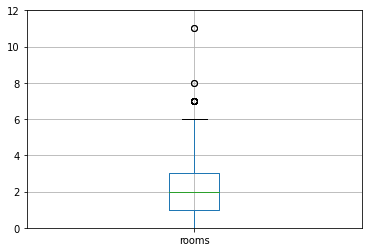

In [46]:
#Изучим данные с помощью диаграммы размаха
data.boxplot(column='rooms')
plt.ylim(0, 12)
plt.show()

In [47]:
data[data['rooms'] > 6] #Изучим данные, которые выходят за 6 комнат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.800000,7,NaN,...,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,<NA>,Город
750,9,29500000.0,188.8,2017-03-04,7,2.70,2,119.300000,1,NaN,...,0,Санкт-Петербург,20965.0,814.0,0,NaN,2,267.0,246,Город
855,18,15000000.0,134.0,2017-10-27,7,2.70,4,88.000000,3,NaN,...,0,Санкт-Петербург,22670.0,3936.0,1,803.0,1,387.0,150,Город
1813,0,15000000.0,179.0,2017-04-09,7,2.70,5,126.400000,5,NaN,...,0,Санкт-Петербург,20070.0,3186.0,1,104.0,1,803.0,15,Город
1943,20,16000000.0,184.4,2018-10-21,7,2.70,6,125.700000,5,NaN,...,0,Санкт-Петербург,23382.0,2923.0,1,525.0,1,791.0,109,Город
2039,3,13520000.0,162.8,2018-03-21,7,3.00,4,121.600000,4,NaN,...,0,Санкт-Петербург,20631.0,1899.0,3,360.0,3,153.0,<NA>,Город
2261,15,17800000.0,164.0,2019-02-12,7,2.70,7,125.900000,7,NaN,...,0,Санкт-Петербург,20139.0,2670.0,2,41.0,3,397.0,<NA>,Город
3365,13,22190000.0,197.0,2017-11-20,7,2.90,6,107.600000,1,NaN,...,0,Санкт-Петербург,21583.0,1211.0,1,437.0,2,22.0,130,Город
3545,6,13700000.0,154.4,2017-02-02,7,3.70,5,117.400000,5,NaN,...,0,Санкт-Петербург,25881.0,4456.0,1,480.0,0,NaN,727,Город
4159,8,17500000.0,146.3,2017-11-08,7,3.30,4,108.000000,3,NaN,...,0,Санкт-Петербург,22665.0,3607.0,0,NaN,0,NaN,<NA>,Город


Данные выглядят правдоподобно, нигде не замечены аномалии.

Далее проверим количество этажей и сам этаж.

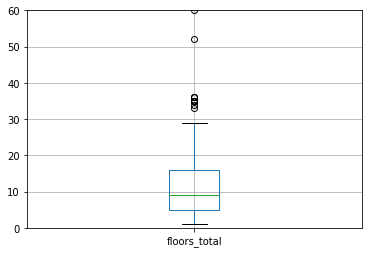

In [48]:
#Изучим данные с помощью диаграммы размаха
data.boxplot(column='floors_total')
plt.ylim(0, 60)
plt.show()

In [49]:
data[data['floors_total'] > 30] #Изучим данные, которые выходят за 30 этажей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
397,15,5990000.0,54.0,2018-03-22,2,2.70,36,21.400000,28,NaN,...,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11,Город
871,14,7777777.0,75.0,2017-11-16,2,2.70,35,40.500000,23,NaN,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,169,Город
1060,10,5200000.0,50.0,2015-11-06,2,2.70,35,39.000000,15,False,...,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,281,Город
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34,18.000000,23,NaN,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,410,Город
1917,13,10150000.0,74.0,2017-11-17,2,2.80,35,34.400000,30,NaN,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,<NA>,Город
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.400000,4,NaN,...,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166,Город
2966,9,4300000.0,37.0,2017-08-08,1,2.70,35,14.000000,15,NaN,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,50,Город
4855,12,5500000.0,50.0,2017-06-22,1,2.80,35,22.000000,4,NaN,...,0,Санкт-Петербург,18627.0,20339.0,1,609.0,3,145.0,537,Город
5749,20,3590000.0,25.0,2017-08-30,0,2.80,35,14.423077,26,NaN,...,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,198,Город
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.000000,13,NaN,...,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38,Город


Всего 31 строк, которые выходят за 'усы', что составляет менее 1% от общего числа объявлений. 30 этажей и более - это скорее редкое значение, поэтому избавимся от них.

In [50]:
data = data[data['floors_total'] < 30]

In [51]:
data.sort_values('last_price') 
#Цена в объявлении равна 12 190, что скорее всего соответствует 12 190 000, судя по квадратуре помещения, но мы не можем знать
#точно, поэтому от данной строчки лучше избавиться

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
8793,7,12190.0,109.0,2019-03-20,2,2.750,25,32.000000,25,NaN,...,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8,Город
17456,7,430000.0,30.4,2019-04-22,1,2.500,2,16.000000,1,NaN,...,0,Сланцы,NaN,NaN,0,NaN,0,NaN,<NA>,Город
16219,14,450000.0,38.5,2018-07-11,2,2.650,2,22.211538,1,NaN,...,0,Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45,Деревня
5698,7,450000.0,42.0,2017-07-31,2,2.615,1,23.000000,1,NaN,...,0,Будогощь,NaN,NaN,0,NaN,0,NaN,233,Поселок
23484,11,470000.0,44.5,2018-07-02,2,2.500,2,28.000000,2,NaN,...,0,Сланцы,NaN,NaN,0,NaN,0,NaN,298,Город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16647,15,122000000.0,145.0,2017-04-25,3,3.300,6,36.000000,2,NaN,...,0,Санкт-Петербург,33931.0,7023.0,2,478.0,3,250.0,335,Город
4996,20,124000000.0,124.5,2017-10-12,4,3.000,4,67.200000,2,False,...,0,Санкт-Петербург,20399.0,1722.0,3,302.0,3,172.0,45,Город
17912,17,135000000.0,166.0,2019-02-07,3,3.300,7,52.000000,1,NaN,...,0,Санкт-Петербург,32863.0,5955.0,2,230.0,3,215.0,<NA>,Город
22831,18,289238400.0,187.5,2019-03-19,2,3.370,6,63.700000,6,NaN,...,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,<NA>,Город


In [52]:
data = data[data['last_price'] != 12190]

In [53]:
data['airports_nearest'].sort_values() #Маловероятно, что жилье находится в аэропорту

21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
          ...  
23682       NaN
23683       NaN
23692       NaN
23695       NaN
23698       NaN
Name: airports_nearest, Length: 23166, dtype: float64

In [54]:
data = data[data['airports_nearest'] != 0]

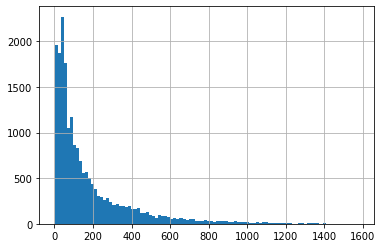

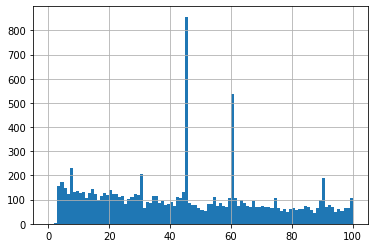

In [55]:
#Изучим сроки размещений объявлений с помощью гистограммы
data['days_exposition'].hist(bins=100)
plt.show()
data['days_exposition'].hist(bins=100, range=(0, 100))
plt.show()

На гистограмме четко видны выбросы в значениях 45, 60 и 90 дней. Скорее всего данные выбросы связаны с тем, что продавец прибегал к услугам фирм, для продажи квартир, которые обязуются продать квартиру за определенный срок или выкупят ее сами. Избавимся от данных выбросов.

In [56]:
data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

Еще раз изучим данные о таблице, что бы посмотреть от какого количества данных мы избавились

In [57]:
len(data) # 23 699 изначальное количество строк в таблице

18497

In [58]:
display(f'В общей сложности мы удалили приблизительно {1-len(data)/23699:.1%}')

'В общей сложности мы удалили приблизительно 22.0%'

В общей сложности не рекомендуется удалять более 10% от исходных данных, но ввиду всех изменений наши данные стали более качественные, и тем самым анализ будет более точным.

In [59]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,18497.000000,1.849700e+04,18497.000000,18497.000000,18497.000000,18497.000000,18497.000000,18497.000000,18497.000000,18497.000000,14461.000000,14478.000000,18497.000000,6318.000000,18497.000000,7130.000000,18497.000000
mean,9.735687,5.807066e+06,57.042208,1.995945,2.695438,10.892307,32.576457,5.978537,10.156985,0.599286,28792.964041,14311.888935,0.465211,490.675530,0.586257,523.764376,190.505433
std,5.631349,5.598275e+06,25.678405,0.977933,0.202263,6.564383,16.811991,4.901233,5.126677,0.951003,12723.138435,8509.182353,0.739395,342.880769,0.874494,276.587398,224.650443
min,0.000000,4.500000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.300000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,18398.000000,9626.000000,0.000000,287.000000,0.000000,303.000000,41.000000
50%,9.000000,4.500000e+06,50.400000,2.000000,2.700000,9.000000,29.900000,4.000000,9.000000,0.000000,26799.000000,13174.500000,0.000000,455.000000,0.000000,509.000000,109.000000
75%,14.000000,6.498000e+06,67.200000,3.000000,2.700000,16.000000,41.000000,8.000000,11.600000,1.000000,37407.000000,16293.000000,1.000000,614.000000,1.000000,733.000000,250.000000
max,50.000000,3.300000e+08,200.000000,11.000000,4.500000,28.000000,159.600000,27.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы, которые будут содержать слудующую информацию:
- `square_meter_price` - цена одного квадратного метра;
- `week_of_publication` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month_of_publication` - месяц публикации объявления;
- `year_of_publication` - год публикации объявления;
- `floor_category` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `cityCenters_disctance` - расстояние до центра города в километрах.

In [60]:
data['square_meter_price'] = data['last_price'] / data['total_area']

In [61]:
data['week_of_publication'] = data['first_day_exposition'].dt.weekday

In [62]:
data['month_of_publication'] = data['first_day_exposition'].dt.month

In [63]:
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [64]:
#Напишем функцию, которая поможет определить тип этажа
def categorize_floor (row):
    try:
        if row['floor'] == 1:
            return 'Первый'
        elif row['floor'] == row['floors_total']:
            return 'Последний'
        else:
            return 'Другой'
    except:
        return 'Нет категории'

In [65]:
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [66]:
data['cityCenters_disctance'] = (data['cityCenters_nearest'] / 1000).round()

## Проведите исследовательский анализ данных

### Изучим параметры объекта

<AxesSubplot:>

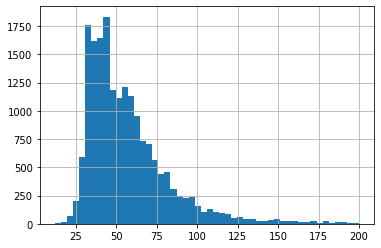

In [67]:
data['total_area'].hist(bins=50)

По гистограмме видно, что большая часть объявлений имеет общую площадь примерно от 30 квадратных метров до 80, что свойственно 1-комнатным - 3х-комнатным квратирам. После 80 квадратов идет равномерный спад.

<AxesSubplot:>

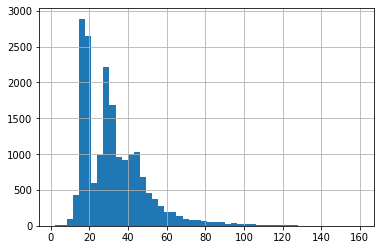

In [68]:
data['living_area'].hist(bins=50)

На данной гистограмме видно 3 пика, около 18 квадратных метров, 30 и 45, что опять же свойственно 1, 2 и 3х-комнатным квратирам соответственно, так как такие предложения преобладают на рынке недвижимости.

<AxesSubplot:>

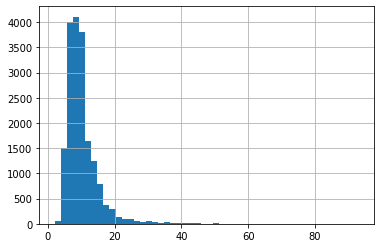

In [69]:
data['kitchen_area'].hist(bins=50)

Данная гистограмма показывает нормальное распределение, так как в основном площадь кухни в квартирах варьируется от 5 до 15 квадратных метров. Все что больше может относится, например, к частному дому, где размер кухни зависит только от владельца.

<AxesSubplot:>

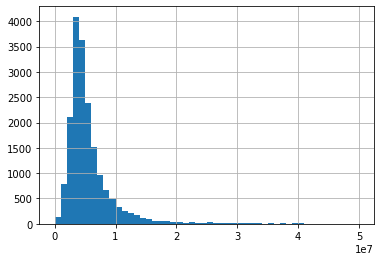

In [70]:
data['last_price'].hist(bins=50, range=(0,50000000))

Изначально гистограмма была построена без применения аргумента `range`, для полного изучения данных. Ввиду маленкого количества объявлений, которые превышают порог в 50 миллионов, я отобразил гистограмму чуть ближе. По графику видно, что в основном, цена квартиры варьируется от 400 000 (исходя из таблицы с описаниями данных) до 15 миллионов, что опять же свойственной преобладающему большенству 1, 2 и 3х комнатных квартир.

<AxesSubplot:>

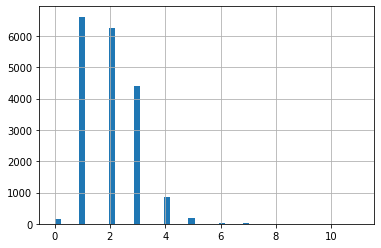

In [71]:
data['rooms'].hist(bins=50)

Данная гистограмма, еще раз подтверждает о преобладании 1, 2 и 3х комнатных квартир. Студии встречаются редко.

<AxesSubplot:>

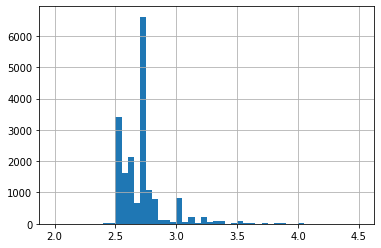

In [72]:
data['ceiling_height'].hist(bins=50)

Средняя высота потолка в квартирах находится в диапозоне от 2.5 метров до 2.8, что подтверждает гистограмма.

<AxesSubplot:>

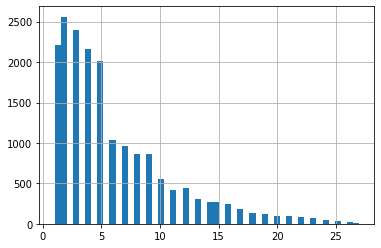

In [73]:
data['floor'].hist(bins=50)

На данной гистограмме можно отследить 3 отрезка:
- квартиры которые находятся с 1 по 5 этаж
- с 6 по 9
- 10 и далее по убыванию

По большей части, что может быть связано с типом постройки:
- 5ти этажный дом
- 9 или 10 этажный дом (как раз 10 этаж служит серединой между 2 и 3 отрезком)
- и много-этажный дом

<AxesSubplot:>

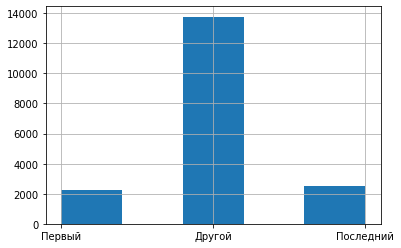

In [74]:
data['floor_category'].hist(bins=5)

Преобладающее большинство объявленй находится на "другом" этаже, что характерно для нормального распределения

<AxesSubplot:>

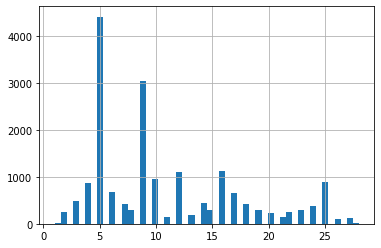

In [75]:
data['floors_total'].hist(bins=50)

Как раз на данном графике мы можем отследить, что:
- 5ти этажные дома преобладают в объявлениях
- далее идут 9ти этажные дома
- 12ти этажные дома
- 16ти этажные
- 25 ти этажные
- остальные - это скорее отклонение от "классической" застройки

<AxesSubplot:>

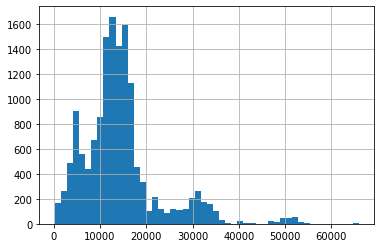

In [76]:
data['cityCenters_nearest'].hist(bins=50)

Большинство квартир находятся в пределах 20км от центра, далее объявлений на продажу уже меньше.

<AxesSubplot:>

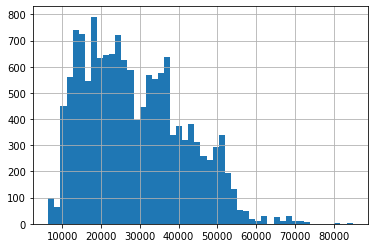

In [77]:
data['airports_nearest'].hist(bins=50)

Ввиду тоого, что аэропорт, в основном, находится за чертой города, то и расстояние до аэропорта ничинается с отметки в 6.5 км, равномерно отдалясь от него.

<AxesSubplot:>

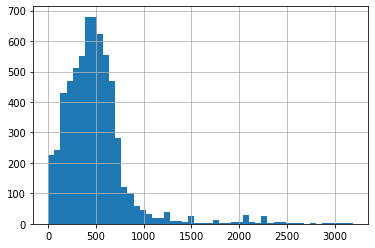

In [78]:
data['parks_nearest'].hist(bins=50)

Так как большая часть объявлений находится в черте города, то следовательно все они находятся недалеко от парков.

<AxesSubplot:>

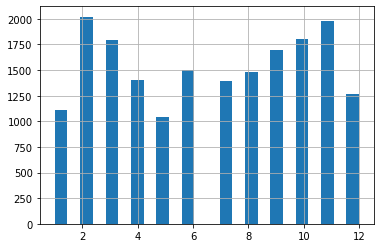

In [79]:
data['month_of_publication'].hist(bins=24)

Активнее всего недвижимость выставляют на продажу весной и осенью.

### Изучим, как быстро продавались квартиры

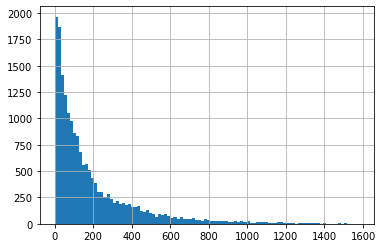

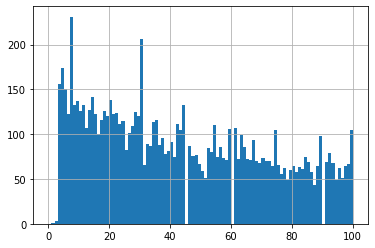

In [80]:
data['days_exposition'].hist(bins=100)
plt.show()
data['days_exposition'].hist(bins=100, range=(0, 100))
plt.show()

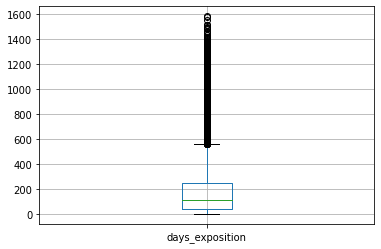

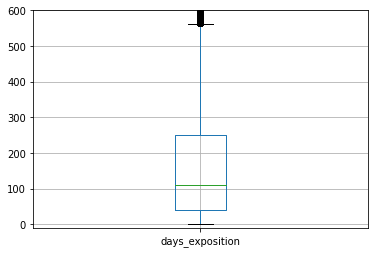

In [81]:
data.boxplot(column='days_exposition')
plt.show()
data.boxplot(column='days_exposition')
plt.ylim(-10, 600)
plt.show()

Изучив графики, можно замтить, что обычно продажа квартиры занимает в среднем 110 дней. Если отталкиваться от диаграммы размаха, то все что продавалось более 500 дней - можно считать долгой продажей, а все что меньше 40 дней - быстрой.

Посчитаем среднее значение и медиану продаж сначала в разрезе по типу населенного пункта, а затем в целом.

In [82]:
data.pivot_table(index='locality_type', values='days_exposition',aggfunc=('count', 'mean', 'median')).sort_values('count')

,count,mean,median
locality_type,,,
Котеджный поселок,1,7.0,7.0
Садовое товарищество,1,307.0,307.0
Село,16,272.1875,268.5
Деревня,710,215.035211,123.5
Поселок,2057,177.437044,107.0
Город,15712,191.028959,108.0


Ввиду того, что количество объявлений в саодовом товариществе, коттеджном поселке и селе незначительно, то данные по ним смотряться нерепрезентативно. В деревне недвижимость продается дольше, чем в поселках и городах, при этом медиана больше всего на 16, но по сути - это не сопоставимые данные ввиду большого расхождения в количестве объявлений. Если рассматривать про длительность размещения объявлений по продаже квартир в городе, медиана еще раз указывает на то, что продажа квартир занимает 108 дней. Если смотреть на среднее значение, то можно заметить что "долгих" продаж, гораздо больше, чем "быстрых", на что указывает смещение показателя к 190 дням.

In [83]:
data['days_exposition'].mean()

190.5054333135103

In [84]:
data['days_exposition'].median()

109.0

Если не рассматривать в разрезе по типу населеного пункта, а в целом, то ввиду преобладания по количеству объявлений а городе, средняя и медиана не сильно отличается, от данных полученных в разрезе.

### Факторы влияющие на стоимость квартиры

Рассмотрим какие факторы влияют на общую стоимость квартиры. Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Для каждого параметра узнаем коэффициент корреляции и построим диаграмму рассеяния, чтобы выяснить насколько взаимосвязаны данные показатели.

0.671921290969173

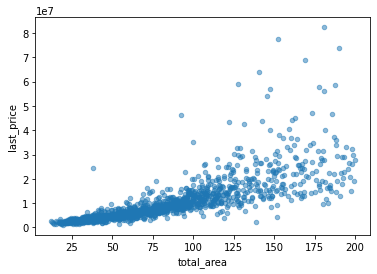

In [85]:
#Для диаграммы рассеяния укажим коэфициент alpha равным 0.5, чтобы лучше увидеть плотность
(
    data.pivot_table(index='total_area', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='total_area', alpha=0.5)
)
data['last_price'].corr(data['total_area'])

Исходя из полученного коэффициента и диаграммы видим наличие связи между 2мя параметрами, но не сильной. Увеличение площади сопровождается увеличением площади, но так бывает не всегда, исключения могут быть связаны, например, с районом квартиры и наличием других факторов.

0.5651123343966357

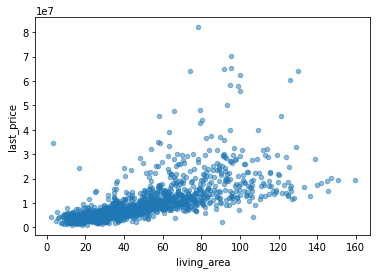

In [86]:
(
    data.pivot_table(index='living_area', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='living_area', alpha=0.5)
)
data['last_price'].corr(data['living_area'])

Зависимость цены от жилой площади присутствует, но выражена менее ярко, так по большей части, на цену влияет общая площадь помещения.

0.5447075943502409

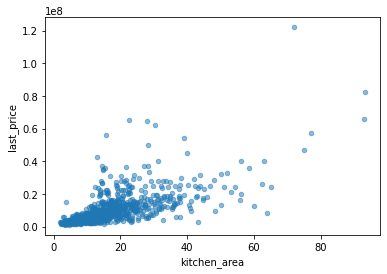

In [87]:
(
    data.pivot_table(index='kitchen_area', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='kitchen_area', alpha=0.5)
)
data['last_price'].corr(data['kitchen_area'])

Ситуация аналогична с зависимостью цены от жилой площади. Также надо учитывать тот фактор, что есть небольшая доля пропусков в таблице, по жилой площади и кухонной, что также влияет на данные диаграммы.

0.39544785886321376

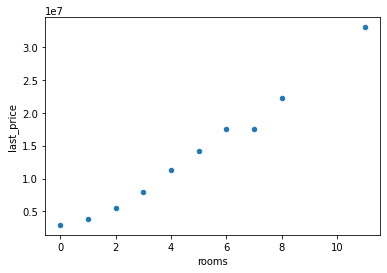

In [88]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='rooms')
)
data['last_price'].corr(data['rooms'])

Зависимость цены от количества комнат незначительна, практически отсутствует. Надо понимать, что планировки бывают разными, следовательно больше комнат, не всегда равно увеличение площади.

Другой       13774
Последний     2507
Первый        2216
Name: floor_category, dtype: int64

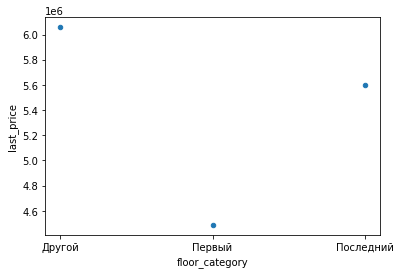

In [89]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='floor_category')
)
data['floor_category'].value_counts()

Так как на данной зависимости мы имеем типы данных `str` и `int`, которые несопоставимы при использовании коэффициента корреляции, то зависимость я решил показать по-другому. На диаграмме видно, что цена квартиры влияет на стоимость квартиры, если мы сопоставляем первый и последний этажи. Первый этаж менее востребован, что нормально для рынка недвижимости, следовательно цена на данные объявления ниже. Но если сопоставлять данные с "другими" этажами - то это некорректно, так как количество таких объявлений во много раз превышает объявления с последними и первыми этажами. Следовательно, самые дорогие квартиры могут находится в диапазоне другие, что очень сильно влияет на стоимость.

<AxesSubplot:xlabel='year_of_publication', ylabel='last_price'>

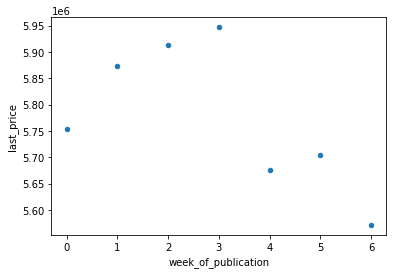

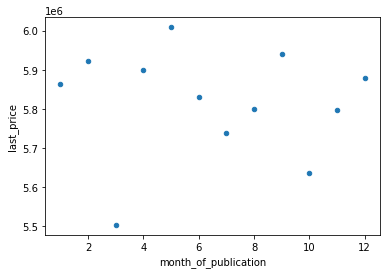

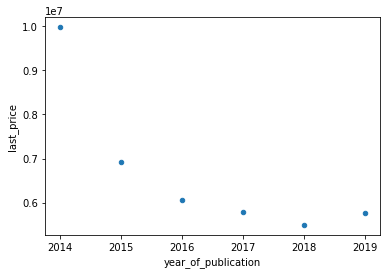

In [90]:
(
    data.pivot_table(index='week_of_publication', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='week_of_publication')
)
(
    data.pivot_table(index='month_of_publication', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='month_of_publication')
)
(
    data.pivot_table(index='year_of_publication', values='last_price', aggfunc=('mean')).reset_index()
    .plot(kind='scatter', y='last_price', x='year_of_publication')
)

In [91]:
#Изучим количество объявлений за каждый год
data['year_of_publication'].value_counts().reset_index().sort_values('index')

,index,year_of_publication
5,2014,115
3,2015,1061
2,2016,2517
0,2017,7219
1,2018,6599
4,2019,986


In [92]:
data['year_of_publication'].corr(data['last_price'])

-0.06494010116109508

Из диаграмм можно сделать вывод, что цена недвижимости никак не зависит от дня недели или месяца публикации. Коэффициент корреляции близится у нулю. Таже ситуаци и с годом, нет четкой зависимости цены от года размещения. Можно отследить динамику спада в цене с 2017 года по 2018 год, но это будет неккоректно, так как в объявлениях 2018 года могут преобладать 1 комнатные квартиры, которые ниже в цене. Корректно будеть сравнивать динамику роста или снижения цены за квадратный метр. 

### Средняя стоимость 1 квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [93]:
#Найдем топ 10 городов по количеству объявлений и сохраним списком
top_10_locality_list = data['locality_name'].value_counts().head(10).index
top_10_locality_list

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object')

In [94]:
#Найдем все строки с топ городами и сохраним в переменной data_top_10
data_top_10 = data[data['locality_name'].isin(top_10_locality_list)]
data_top_10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,square_meter_price,week_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_disctance
1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.600000,1,NaN,...,0,NaN,81,Поселок,82920.792079,1,12,2018,Первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.300000,4,NaN,...,2,574.0,558,Город,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.700,14,91.730769,9,NaN,...,3,234.0,424,Город,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.000000,13,NaN,...,1,48.0,121,Город,100000.000000,1,6,2018,Другой,8.0
6,6,3700000.0,37.30,2017-11-02,1,2.640,26,10.600000,6,NaN,...,0,NaN,155,Поселок,99195.710456,3,11,2017,Другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.050,15,63.000000,12,NaN,...,0,NaN,23,Город,91089.108911,0,4,2019,Другой,14.0
23689,13,3550000.0,35.30,2018-02-28,1,2.860,15,16.300000,4,NaN,...,2,652.0,29,Город,100566.572238,2,2,2018,Другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.700,5,31.000000,2,NaN,...,0,NaN,15,Город,105769.230769,3,7,2018,Другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.750,25,40.300000,7,NaN,...,1,806.0,519,Город,129903.978052,3,10,2016,Другой,4.0


In [95]:
#Проверим по сумме объявлений верно ли выгрузились данные
data['locality_name'].value_counts().head(10).sum()

15336

In [96]:
#Посчитаем среднюю стоимость квадратного метра по топ городам
data_top_10.pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').sort_values('square_meter_price')

,square_meter_price
locality_name,
Выборг,56887.490234
Гатчина,67458.973708
Всеволожск,68517.228964
Колпино,75015.810727
Шушары,78027.721964
Мурино,85526.524168
Парголово,90035.581112
Кудрово,94035.816090
Пушкин,102415.694134


Самая высокая стоимость квадратного метра, как и ожидалось, в Санк-Петербурге, самая низкая в Выборге.

###  Как влияет расстояние до центра города на стоимость квартиры

Ранее мы посчитали расстояние до центра города в километрах. Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [97]:
#Найдем все объявления в Санк-Петербурге и сохраним в переменную sbp_data
spb_data = data[data['locality_name'] == 'Санкт-Петербург']
spb_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,square_meter_price,week_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_disctance
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.300000,4,NaN,...,2,574.0,558,Город,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,91.730769,9,NaN,...,3,234.0,424,Город,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1,48.0,121,Город,100000.000000,1,6,2018,Другой,8.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,...,0,NaN,289,Город,88524.590164,6,2,2017,Другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,NaN,...,2,553.0,137,Город,127525.252525,3,11,2017,Другой,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.000000,12,NaN,...,0,NaN,23,Город,91089.108911,0,4,2019,Другой,14.0
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.300000,4,NaN,...,2,652.0,29,Город,100566.572238,2,2,2018,Другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5,31.000000,2,NaN,...,0,NaN,15,Город,105769.230769,3,7,2018,Другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300000,7,NaN,...,1,806.0,519,Город,129903.978052,3,10,2016,Другой,4.0


In [98]:
#Найдем среднюю цену квадратного метра в зависимости от удаленности от центра города и сохраним в переменной spb_data_pivot
#и обновим индексы, чтобы в дальнейшем мы могли использовать данную переменную для визуализации
spb_data_pivot = spb_data.pivot_table(index='cityCenters_disctance', values='square_meter_price', aggfunc='mean').reset_index()
spb_data_pivot

,cityCenters_disctance,square_meter_price
0,0.0,198989.280916
1,1.0,149924.646937
2,2.0,141612.566858
3,3.0,115939.853532
4,4.0,126013.991961
5,5.0,134479.601407
6,6.0,142060.802387
7,7.0,149282.324257
8,8.0,121810.479525
9,9.0,110633.895683


-0.7859548358107822

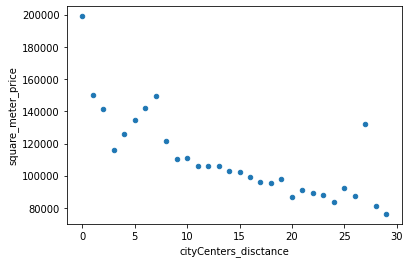

In [99]:
spb_data_pivot.plot(kind='scatter', x='cityCenters_disctance', y='square_meter_price')
spb_data_pivot['cityCenters_disctance'].corr(spb_data_pivot['square_meter_price'])

Благодаря графику и коэффициенту корреляции видна сильная зависимость цены недвижимости за квадратный метр от близости к центру города. Положительный коэффициент корреляции с 3 по 7 км., может быть связан, например, с осбенностью районов в этой зоне, что сказывается на цене. Но общая картина показывает обратную зависимость.

## Общий вывод

В данном проекте нам было предложено ознакомиться с данными сервиса Яндекс Недвижимость, которые содержат архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Первым делом данные прошли предобработку, а именно: 
1. Мы проверили данные на наличие пропущенных значений, которые по возможности были восстановлены, а остальные удалены;
2. Изучив информацию о датафрейме, мы изменили типы данных, для удобства работы с ними;
3. Таблица была проверена на наличие дубликатов, как явных, так и неявных. Ввиду большого количества дубликатов в столбце `locality_name`, который хранит в себе названия населенных пунктов, было принято решение категоризировать их по типу населенного пункта и оставить только названия, тем самым полностью избавляясь от дубликатов;
4. Все аномальные значения в данных были либо устранены, либо скорректированы.

Для дальнейшего анализа в датафрейм были добавлены следующие столбцы:
- square_meter_price - цена одного квадратного метра;
- week_of_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- month_of_publication - месяц публикации объявления;
- year_of_publication - год публикации объявления;
- floor_category - тип этажа квартиры (значения — «первый», «последний», «другой»);
- cityCenters_disctance - расстояние до центра города в километрах.

Для начала анализа мы изучили параметры объявлений и как быстро продавались те или иные типы квартир.
Изучили факторы влияющие на стоимость квартиры и высчитали среднюю стоимость 1 квадратного метра топ 10 городов по количеству объявлений. А в конце посмотрели, как влияет расстояние до центра на цену за квадратный метр.

После проделанной работы можно сделать следующие выводы:
1. Большую часть объявлений приходится на 1, 2 и 3х комнатные квартиры с общей площадью до 80 квадратных метров;
2. Средняя высота потолка в квартирах находится в диапозоне от 2.5 метров до 2.8;
3. Основная сачть домов в объявлениях - это 5ти или 9ти этажные;
4. В среднем продажа квартиры занимает около 110 дней; 
6. Стоимость 1 квадратного метра в Санкт-Петербурге дороже, чем в соседних населенных пунктах;

Общая стоимость квартиры складывается из различных факторов, которые так или иначе влекут за собой увеличение или уменьшение цены. Например, планировка, наличие ремонта, этаж, район, наличие балкона и так далее. Но самые основные факторы которые влияют на цену - это тип населенного пункта, где находится помещение, а также общая площадь и расстояние до центра города.